# Figure 1C 
This module analyzes Gal4p targets found by CC. We looked at how many targets have a Gal4p canonical site (PWM > = 13.01) and how many dont (PWM < 13.01).

Written by PSR 02/24/22

In [1]:
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy 
import itertools
import seaborn as sns
import statannotations
import statsmodels.api as sm
import ast
from statsmodels.formula.api import ols
from statannotations.Annotator import Annotator
from scipy import stats
from analyze_sig_hits_v2 import *
from analyze_sort_seq import *
from bioinfokit.analys import stat
from statistics import mean


In [2]:
df = pd.read_csv("gal4_bound_pssm_cutoff_all.csv",sep = ",")

In [15]:
df

,Unnamed: 0,Gal4_FL TPH BS,Gal4_FL pvalue,Gal4_DBD TPH BS,Gal4_DBD pvalue,Sequence,Log2FC,Left Common Name,Right Common Name,gal4 pos,gal4 score,gal4 orientaion
0,0,5223.260730,0.000000e+00,4726.492493,0.000000e+00,TGCCAAGCTGTATGGCAAGCAGACCAAAGGTCATGATGAGATATTT...,-0.144181,EMP46,GAL2,"[420, 599, 688, 713, 716, 796]","[3.2100000000000004, 9.97, 2.4699999999999993,...","[-1, -1, -1, -1, 1, -1]"
1,1,4150.400945,0.000000e+00,3958.781375,0.000000e+00,CATACAATGGAGCTGTGGGCTTGTAAGCAGCCTCCTGTTGACCTAA...,-0.068194,GAL7,GAL10,"[28, 327, 414, 607]","[1.520000000000001, 13.490000000000002, 12.719...","[1, 1, 1, 1]"
2,2,3173.825349,0.000000e+00,3177.730496,0.000000e+00,CGCCGCTAGAACTGGACGAGGAAGATGAAGAAGAAGAGGAGGAGGA...,0.001774,SRP40,PTR2,"[1182, 1272, 1324, 1479, 1567, 2118]","[2.9099999999999997, 4.849999999999999, 6.3000...","[1, 1, 1, 1, -1, 1]"
3,3,2484.335559,0.000000e+00,1375.819691,0.000000e+00,TTATGCCTAAAGATTCATCTGAATGATAGGTTATGGAATATTTACT...,-0.852569,KTI12,HAP4,"[680, 1355, 1769, 1817, 1861, 1949]","[1.5800000000000014, 1.330000000000001, 3.37, ...","[-1, -1, -1, -1, 1, 1]"
4,4,2469.753335,0.000000e+00,764.050697,0.000000e+00,TACATCGAAGAGATTTAAGAAGAATATTAGTTAACTTTAACGCGTT...,-1.692627,AGE1,SNA2,"[383, 782, 1118, 1262, 1282, 1451, 1553, 1583]","[4.83, 0.5300000000000001, 0.3399999999999993,...","[1, 1, 1, -1, 1, -1, -1, -1]"
...,...,...,...,...,...,...,...,...,...,...,...,...
77,102,56.984563,1.474995e-09,50.546648,4.440902e-04,AGTGTAGCGGGAGTGGCTCTTTCCACGAATATAACGCTATATACAT...,-0.172956,SRB2,NCP1,"[113, 680, 838, 887, 919]","[1.1399999999999995, 2.4099999999999997, 7.319...","[1, 1, 1, -1, 1]"
78,106,66.521735,0.000000e+00,37.075006,1.136823e-02,ACCACGGGAGGAGGCCACGGCTGTCGAAACACTGATGCTATTGTCG...,-0.843379,WHI5,LPX1,[393],[0.46999999999999986],[1]
79,108,50.163313,2.438438e-07,32.263705,2.572737e-02,TTATGCCTTCGGCGGCTGCCACCGTCTACAGGCATACGACCGCCGG...,-0.636721,SRX1,MDH1,"[52, 111, 271, 324]","[6.84, 4.1899999999999995, 0.3799999999999979,...","[1, -1, 1, 1]"
80,111,44.304322,6.710053e-06,77.489932,2.909761e-11,TCTCCTCTTTAATAAACCCTACAGGAGGGCTTGGCACGAAAGCGGT...,0.806561,CIN5,DFG16,"[532, 588, 830, 1421, 2092, 2478]","[1.049999999999999, 7.039999999999999, 0.45000...","[-1, -1, 1, -1, 1, -1]"


In [6]:
n = 3
list_of_lists = []
gene_names = []
mean_scores = []
#loops through df and takes the top three highest scoring PWMs and adds to list along with promoter name
for index, row in df.iterrows():
    ini_list= row['gal4 score']
    res = ast.literal_eval(ini_list)
    if len(res) > 2:
        gene_names.append(row["Right Common Name"])
        res.sort()
        top3 = res[-n:]
        m_t = max(res)
        list_of_lists.append(top3)
        mean_scores.append(m_t)
    else:
        gene_names.append(row["Right Common Name"])
        list_of_lists.append(res)
        

In [7]:
gene_name = df["Right Common Name"].tolist()

In [8]:
df2 = pd.DataFrame(list(zip(gene_names, list_of_lists)), columns=['gene','pssm'])

In [9]:
df3 = pd.DataFrame(list(zip(gene_names, mean_scores)), columns=['gene','max_score'])

In [11]:
df2

,gene,pssm
0,GAL2,"[11.639999999999997, 12.27, 16.119999999999997]"
1,GAL10,"[2.999999999999998, 12.719999999999999, 13.490..."
2,PTR2,"[2.9099999999999997, 4.849999999999999, 6.3000..."
3,HAP4,"[2.239999999999999, 3.37, 7.08]"
4,SNA2,"[4.83, 6.76, 7.17]"
...,...,...
77,NCP1,"[2.53, 5.01, 7.319999999999999]"
78,LPX1,[0.46999999999999986]
79,MDH1,"[1.2199999999999995, 4.1899999999999995, 6.84]"
80,DFG16,"[1.049999999999999, 1.53, 7.039999999999999]"


In [12]:
# df2["orientation"] = df[df["gal4 orientation"]]

In [13]:
#Changes the orientation of dataframe so that each PWM has its own row 
lst_col = 'pssm'
r = pd.DataFrame({
      col:np.repeat(df2[col].values, df2[lst_col].str.len())
      for col in df2.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(df2[lst_col].values)})[df2.columns]

In [19]:
#promoters that have a score that is below the recommended Gal4 PWM cutoff
filtered = r.loc[r["pssm"] < 13.01]
filtered

,gene,pssm
0,GAL2,11.64
1,GAL2,12.27
3,GAL10,3.00
4,GAL10,12.72
6,PTR2,2.91
...,...,...
224,DFG16,1.05
225,DFG16,1.53
226,DFG16,7.04
227,MBR1,3.82


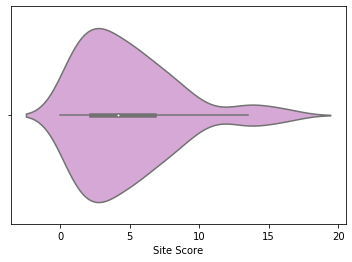

In [30]:
ax = sns.violinplot(x=r["pssm"], color = "plum")
plt.xlabel("Site Score")
plt.savefig("Fig1C_violinplt.pdf")

[0.5,
 1.5,
 2.5,
 3.5,
 4.5,
 5.5,
 6.5,
 7.5,
 8.5,
 9.5,
 10.5,
 11.5,
 12.5,
 13.5,
 14.5,
 15.5,
 16.5,
 17.5,
 18.5,
 19.5,
 20.5,
 21.5,
 22.5,
 23.5,
 24.5,
 25.5,
 26.5,
 27.5,
 28.5,
 29.5,
 30.5,
 31.5,
 32.5,
 33.5,
 34.5,
 35.5,
 36.5,
 37.5,
 38.5,
 39.5,
 40.5,
 41.5,
 42.5,
 43.5,
 44.5,
 45.5,
 46.5,
 47.5,
 48.5,
 49.5,
 50.5,
 51.5,
 52.5,
 53.5,
 54.5,
 55.5,
 56.5,
 57.5,
 58.5,
 59.5,
 60.5,
 61.5,
 62.5,
 63.5,
 64.5,
 65.5,
 66.5,
 67.5,
 68.5,
 69.5,
 70.5,
 71.5,
 72.5,
 73.5,
 74.5,
 75.5,
 76.5,
 77.5,
 78.5,
 79.5,
 80.5,
 81.5]

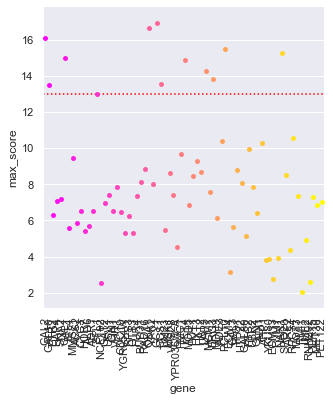

In [136]:
#GRaph showing the distribution of Gal4 PWM scores for each Gal4p target 
ax = sns.catplot(x="gene", y="max_score", data=df3, palette = "spring")
# sns.stripplot(x = "gene",y = "pssm", data = r, color = "black")

plt.xticks(rotation=90)
plt.axhline(y = 13 , color = "red", linestyle = ':')


x = -0.5

nn = []

for p in range(82):
    x+=1
    nn.append(x)
    
        
    #plt.axvspan(-0.5, x, facecolor='green', alpha=0.5)
# plt.axvspan(0.5,1.5, facecolor='green', alpha=0.5)
# plt.axvspan(1.5, 2.5, facecolor='green', alpha=0.5)
# plt.axvspan(2.5, 3.5, facecolor='green', alpha=0.5)
# plt.axvspan(3.5, 4.5, facecolor='green', alpha=0.5)
# plt.axvspan(4.5, 5.5, facecolor='green', alpha=0.5)
# plt.axvspan(5.5, 6.5, facecolor='green', alpha=0.5)
# plt.axvspan(1.5, 2.5, facecolor='green', alpha=0.5)
# plt.axvspan(1.5, 2.5, facecolor='green', alpha=0.5)
# plt.axvspan(1.5, 2.5, facecolor='green', alpha=0.5)




# ax.axhspan(4, 9, facecolor='yellow', alpha=0.5)
# ax.axhspan(9, 12, facecolor='red', alpha=0.5)
nn

#plt.ylabel("site score")
#plt.savefig("gal4_bound_pssm_maxscore2.pdf")

In [151]:
pal = sns.color_palette("rocket",82)
pal
# colors = pal.as_hex()
# n = [-0.5]
# for i in range(82):
#     n.append(i+0.5)

[(0.02275049, 0.02554464, 0.11108639),
 (0.03853466, 0.03365771, 0.12245873),
 (0.05611171, 0.04224835, 0.13411624),
 (0.0732236, 0.05045047, 0.14597263),
 (0.09011319, 0.05808059, 0.15797687),
 (0.10692823, 0.06517224, 0.17009175),
 (0.12375803, 0.07174938, 0.18228425),
 (0.14066867, 0.0778224, 0.19452676),
 (0.15770877, 0.08339312, 0.20679668),
 (0.17489524, 0.08848235, 0.2190294),
 (0.19223028, 0.09317479, 0.23091409),
 (0.21560818, 0.09882993, 0.24611154),
 (0.23334047, 0.10263737, 0.25697736),
 (0.25124182, 0.10608236, 0.26736359),
 (0.26930915, 0.1091727, 0.2772502),
 (0.2875374, 0.11191896, 0.28660853),
 (0.30592213, 0.11432553, 0.29542718),
 (0.32445869, 0.11639585, 0.30369448),
 (0.34314168, 0.11813362, 0.31139721),
 (0.36196644, 0.1195413, 0.31852037),
 (0.38092887, 0.12061482, 0.32506528),
 (0.40002537, 0.12134964, 0.33102734),
 (0.41925278, 0.12173833, 0.33640407),
 (0.44508855, 0.12169883, 0.34266151),
 (0.46461238, 0.12123063, 0.34667231),
 (0.48426077, 0.12036349, 0.3501

In [130]:
# n = [0, 5, 10, 15, 20, 25, 30, 35, 40 , 45, 50, 55, 60, 65, 70, 75, 80]
# len(n)
n

[-0.5,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82]

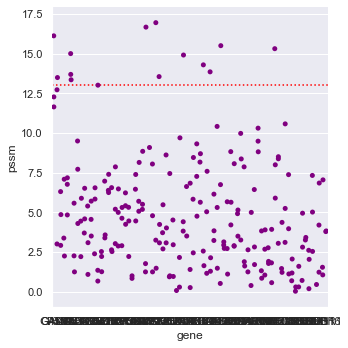

<Figure size 2160x2160 with 0 Axes>

In [42]:
cc = ['red' if x else 'purple' for x in (r.pssm >= 13)]

sns.set_style("white")
sns.set(rc = {'figure.figsize':(30,30)})

with_site = r[r["pssm"] >=13]
without_site = r[r["pssm"] < 13]


sns.catplot(x="gene", y="pssm", data=r, color = "purple")
#sns.stripplot(x = "gene",y = "pssm",  data = without_site,color = "red")
#plt.scatter(r["gene"], r["pssm"], c=cc, s = 100)
# plt.yticks(fontsize=25)
# plt.xticks(fontsize=25, rotation=90)
#plt.xticks(y_pos, columns, 
plt.axhline(y = 13 , color = "red", linestyle = ':')
#plt.set_size_inches(18.5, 10.5)   
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# for z, y, c in zip(n, nn, colors):
#     #print(x)
#     plt.axvspan(z, y, facecolor=c, alpha= 0.4)
plt.tight_layout()
#plt.savefig("fig1c_finalopt3.pdf")

In [138]:
r

,gene,pssm
0,GAL2,11.64
1,GAL2,12.27
2,GAL2,16.12
3,GAL10,3.00
4,GAL10,12.72
...,...,...
224,DFG16,1.05
225,DFG16,1.53
226,DFG16,7.04
227,MBR1,3.82
